# Lecture 4 –Fall 2023

A demonstration of advanced `pandas` syntax to accompany Lecture 4.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Dataset: California baby names

In today's lecture, we'll work with the `babynames` dataset, which contains information about the names of infants born in California.

The cell below pulls census data from a government website and then loads it into a usable form. The code shown here is outside of the scope of Data 100, but you're encouraged to dig into it if you are interested!

In [ ]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'STATE.CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


### Exercises
We want to obtain the first three baby names with `count > 250`.

1.Code this using head()

2.Code this using loc

3.Code this using iloc

4.Code this using []


In [ ]:
# Answer Here

# Not using .head function

first_three_babynames_count_250 = babynames[babynames["Count"] > 250].head(3)
first_three_babynames_count_250

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [ ]:
# Answer Here

# Using .loc method

# first_three_babynames_count_250_reset_index = babynames[babynames["Count"] > 250].reset_index(drop=True)
# first_three_babynames_count_250_loc = first_three_babynames_count_250_reset_index.loc[:2]
# first_three_babynames_count_250_loc


first_three_babynames_count_250 = babynames[babynames["Count"] > 250]
first_three_babynames_count_250_index = first_three_babynames_count_250.index[0:3]
first_three_babynames_count_250_loc = first_three_babynames_count_250.loc[first_three_babynames_count_250_index]
first_three_babynames_count_250_loc

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [ ]:
# Answer Here

# Using .iloc method

first_three_babynames_count_250_iloc = babynames[babynames["Count"] > 250].iloc[:3]
first_three_babynames_count_250_iloc

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [ ]:
# Answer Here

# Using [] method

first_three_babynames_count_250_brac = babynames[babynames["Count"] > 250]
first_three_babynames_count_250_bracket = first_three_babynames_count_250_brac[:3]
first_three_babynames_count_250_bracket

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


### `.isin` for Selection based on a list, array, or `Series`

In [ ]:
# Note: The parentheses surrounding the code make it possible to break the code into multiple lines for readability
babynames[(babynames["Name"] == "Bella") |
              (babynames["Name"] == "Alex") |
              (babynames["Name"] == "Narges") |
              (babynames["Name"] == "Lisa")]


,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
...,...,...,...,...,...
393248,CA,M,2018,Alex,495
396111,CA,M,2019,Alex,438
398983,CA,M,2020,Alex,379
401788,CA,M,2021,Alex,333


In [ ]:
# A more concise method to achieve the above: .isin
#Answer Here

babyname_list = ["Bella", "Alex", "Narges", "Lisa"]
babynames_present = babynames[babynames["Name"].isin(babyname_list)]
babynames_present


,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
...,...,...,...,...,...
393248,CA,M,2018,Alex,495
396111,CA,M,2019,Alex,438
398983,CA,M,2020,Alex,379
401788,CA,M,2021,Alex,333


### `.str` Functions for Defining a Condition

In [ ]:
# What if we only want names that start with "J"?
#Answer Here

names_starts_with_J = babynames[babynames["Name"].str.startswith("J")]
names_starts_with_J

,State,Sex,Year,Name,Count
16,CA,F,1910,Josephine,66
44,CA,F,1910,Jean,35
46,CA,F,1910,Jessie,32
59,CA,F,1910,Julia,28
66,CA,F,1910,Juanita,25
...,...,...,...,...,...
407245,CA,M,2022,Jibreel,5
407246,CA,M,2022,Joseangel,5
407247,CA,M,2022,Josejulian,5
407248,CA,M,2022,Juelz,5


# Custom Sort

In [ ]:
# Sort a Series Containing Names

simple_sort = babynames["Name"].sort_values()
simple_sort


366001      Aadan
384005      Aadan
369120      Aadan
398211    Aadarsh
370306      Aaden
           ...   
220691      Zyrah
197529      Zyrah
217429      Zyrah
232167      Zyrah
404544      Zyrus
Name: Name, Length: 407428, dtype: object

In [ ]:
# Sort a DataFrame – there are lots of Michaels in California

michaels = babynames[(babynames["Name"] == "Michael") & (babynames["Sex"] == "M")]
sorted_by_name = michaels.sort_values("Name", ascending=False)
sorted_by_name


,State,Sex,Year,Name,Count
239596,CA,M,1910,Michael,13
279440,CA,M,1967,Michael,8135
324987,CA,M,1993,Michael,5847
322417,CA,M,1992,Michael,6638
319905,CA,M,1991,Michael,7573
...,...,...,...,...,...
256697,CA,M,1944,Michael,2796
255978,CA,M,1943,Michael,2418
255298,CA,M,1942,Michael,1959
254681,CA,M,1941,Michael,1379


### Approach 1: Create a temporary column

In [ ]:
# Create a Series of the length of each name

# Add the Series as a new column to the DataFrame

# Sort the DataFrame by the new column


# Note : I define all these steps bellow

,State,Sex,Year,Name,Count,name_lengths
83016,CA,F,1979,Ji,5,2
331174,CA,M,1993,Vu,5,2
298821,CA,M,1978,Al,13,2
277555,CA,M,1962,Ty,55,2
404824,CA,M,2020,Jj,6,2
...,...,...,...,...,...,...
337819,CA,M,1996,Franciscojavier,8,15
325562,CA,M,1991,Franciscojavier,6,15
316193,CA,M,1987,Franciscojavier,5,15
317627,CA,M,1988,Franciscojavier,10,15


In [ ]:
# Step 1 : Create a Series of the length of each name

babynames_names_length = babynames["Name"].str.len()
babynames_names_length

0         4
1         5
2         7
3         8
4         7
         ..
407423    7
407424    3
407425    4
407426    6
407427    4
Name: Name, Length: 407428, dtype: int64

In [ ]:
# Step 2 : Add the Series as a new column to the DataFrame

babynames["Name Length"] = babynames_names_length
babynames

,State,Sex,Year,Name,Count,Name Length
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7
...,...,...,...,...,...,...
407423,CA,M,2022,Zayvier,5,7
407424,CA,M,2022,Zia,5,3
407425,CA,M,2022,Zora,5,4
407426,CA,M,2022,Zuriel,5,6


In [ ]:
# Step 3 : Sort the DataFrame by the new column

babynames_sorted = babynames.sort_values("Name Length")
babynames_sorted

,State,Sex,Year,Name,Count,Name Length
326570,CA,M,1993,An,8,2
292150,CA,M,1976,Al,13,2
252556,CA,M,1937,Al,21,2
401470,CA,M,2020,Jr,5,2
260022,CA,M,1948,Ed,43,2
...,...,...,...,...,...,...
339472,CA,M,1998,Franciscojavier,6,15
327358,CA,M,1993,Johnchristopher,5,15
337477,CA,M,1997,Ryanchristopher,5,15
312543,CA,M,1987,Franciscojavier,5,15


In [ ]:
# drop new column

babynames_sorted = babynames_sorted.drop("Name Length", axis=1)
babynames_sorted

,State,Sex,Year,Name,Count
326570,CA,M,1993,An,8
292150,CA,M,1976,Al,13
252556,CA,M,1937,Al,21
401470,CA,M,2020,Jr,5
260022,CA,M,1948,Ed,43
...,...,...,...,...,...
339472,CA,M,1998,Franciscojavier,6
327358,CA,M,1993,Johnchristopher,5
337477,CA,M,1997,Ryanchristopher,5
312543,CA,M,1987,Franciscojavier,5


### Approach 2: Sorting using the `key` argument

---



In [ ]:
# Answer Here
sort_using_key_argument = babynames.sort_values("Name", key=lambda x: x.str.len())
sort_using_key_argument

,State,Sex,Year,Name,Count,Name Length
326570,CA,M,1993,An,8,2
292150,CA,M,1976,Al,13,2
252556,CA,M,1937,Al,21,2
401470,CA,M,2020,Jr,5,2
260022,CA,M,1948,Ed,43,2
...,...,...,...,...,...,...
339472,CA,M,1998,Franciscojavier,6,15
327358,CA,M,1993,Johnchristopher,5,15
337477,CA,M,1997,Ryanchristopher,5,15
312543,CA,M,1987,Franciscojavier,5,15


### Approach 3: Sorting Using the `map` Function

We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [ ]:

# Define a function to count occurrences of 'dr' and 'ea'


# Apply the function to each name in the "Name" column and add as a new column

# Sort the DataFrame by the new column in descending order

# Display the top rows


,State,Sex,Year,Name,Count,dr_ea_count
115965,CA,F,1990,Deandrea,5,3
108738,CA,F,1988,Deandrea,5,3
131037,CA,F,1994,Leandrea,5,3
101982,CA,F,1986,Deandrea,6,3
311780,CA,M,1985,Deandrea,6,3


In [ ]:
# Step 1 : Define a function to count occurrences of 'dr' and 'ea'

def dr_ea_count_occurance(name):
    dr_count_occur = name.count("dr")
    ea_count_occur = name.count("ea")
    return dr_count_occur + ea_count_occur

In [ ]:
# Step 2: Apply the function to each name in the "Name" column and add as a new column

babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count_occurance)
babynames

,State,Sex,Year,Name,Count,dr_ea_count
0,CA,F,1910,Mary,295,0
1,CA,F,1910,Helen,239,0
2,CA,F,1910,Dorothy,220,0
3,CA,F,1910,Margaret,163,0
4,CA,F,1910,Frances,134,0
...,...,...,...,...,...,...
407423,CA,M,2022,Zayvier,5,0
407424,CA,M,2022,Zia,5,0
407425,CA,M,2022,Zora,5,0
407426,CA,M,2022,Zuriel,5,0


In [ ]:
# Step 3 : Sort the DataFrame by the new column in descending order

babynames_sorted = babynames.sort_values("dr_ea_count", ascending=False)
babynames_sorted

,State,Sex,Year,Name,Count,dr_ea_count
131029,CA,F,1994,Leandrea,5,3
101976,CA,F,1986,Deandrea,6,3
308131,CA,M,1985,Deandrea,6,3
115957,CA,F,1990,Deandrea,5,3
108731,CA,F,1988,Deandrea,5,3
...,...,...,...,...,...,...
139084,CA,F,1997,Areli,49,0
139083,CA,F,1997,Xena,50,0
139082,CA,F,1997,Unique,50,0
139081,CA,F,1997,Tierra,50,0


In [ ]:
# Step 4 : Display the top rows

babynames_sorted.head()

,State,Sex,Year,Name,Count,dr_ea_count
131029,CA,F,1994,Leandrea,5,3
101976,CA,F,1986,Deandrea,6,3
308131,CA,M,1985,Deandrea,6,3
115957,CA,F,1990,Deandrea,5,3
108731,CA,F,1988,Deandrea,5,3


In [ ]:
# Drop the `dr_ea_count` column

babynames_sorted = babynames_sorted.drop("dr_ea_count", axis=1, inplace=True)
babynames_sorted

## Grouping

Group rows that share a common feature, then aggregate data across the group.

In this example, we count the total number of babies born in each year (considering only a small subset of the data, for simplicity).

<img src="images/groupby.png" width="800"/>

In [ ]:
# Step 1:  DataFrame with baby gril names only

# Answer Here
# Step 2: Groupby similar features like year and apply aggregate

# Answer Here
# Step 3: Sort by Count

# Step 4: Sort by Count in descending order

# Answer Here


In [ ]:
# Step 1 : DataFrame with baby gril names only

baby_gril_names = babynames[babynames["Sex"] == "F"]
baby_gril_names

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
239532,CA,F,2022,Zemira,5
239533,CA,F,2022,Ziggy,5
239534,CA,F,2022,Zimal,5
239535,CA,F,2022,Zosia,5


In [ ]:
# Step 2 : Groupby similar features like year and apply aggregate

baby_gril_names_grouped = baby_gril_names.groupby("Year")[["Count"]].agg("sum")
baby_gril_names_grouped

,Count
Year,
1910,5950
1911,6602
1912,9804
1913,11860
1914,13815
...,...
2018,189208
2019,184228
2020,173763


from matplotlib import pyplot as plt
baby_gril_names_grouped['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
baby_gril_names_grouped['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Step 3 : Sort by Count

baby_gril_names_grouped_sorted = baby_gril_names_grouped.sort_values(by='Count')
baby_gril_names_grouped_sorted

,Count
Year,
1910,5950
1911,6602
1912,9804
1913,11860
1914,13815
...,...
1989,243982
1993,249575
1992,256772


In [ ]:
# Step 4: Sort by Count in descending order

baby_gril_names_grouped_sorted_descending = baby_gril_names_grouped.sort_values(by='Count',ascending=False)
baby_gril_names_grouped_sorted_descending

,Count
Year,
1990,262411
1991,261491
1992,256772
1993,249575
1989,243982
...,...
1914,13815
1913,11860
1912,9804


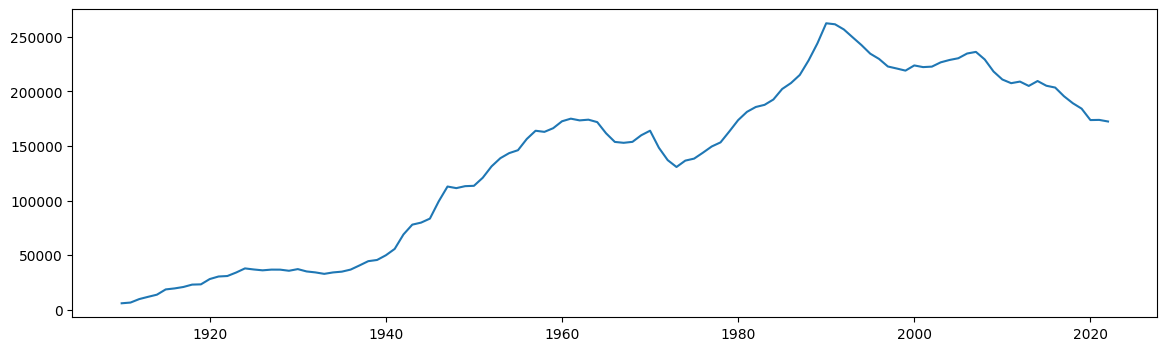

In [ ]:
# Plot Graph

fig, ax = plt.subplots(figsize=(14, 4)) # Set the figure size ( 10 = width in inches , 6 = height in inches )
plt.plot(baby_gril_names_grouped.index, baby_gril_names_grouped["Count"])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

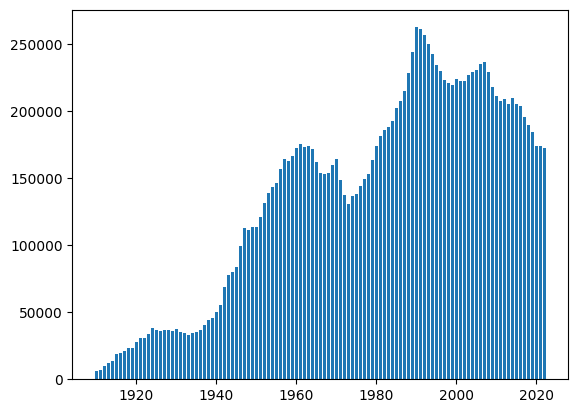

In [ ]:
plt.bar(baby_gril_names_grouped.index, baby_gril_names_grouped["Count"])
plt.set_xlabel('Year')
plt.set_ylabel('Count')
plt.show()

In [ ]:
# print first 10 entries

baby_gril_names_grouped_sorted_descending.head(10)


,Count
Year,
1990,262411
1991,261491
1992,256772
1993,249575
1989,243982
1994,242473
2007,236200
2006,234720
1995,234577


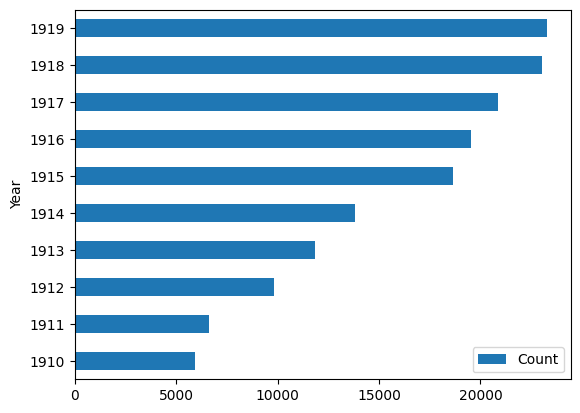

In [ ]:
# Plot in Matplot

baby_gril_names_grouped.head(10).plot(kind="barh")
plt.show()

In [ ]:
# the total baby count in each year
# Answer Here

baby_gril_names_grouped_sum = baby_gril_names.groupby("Year")[["Count"]].agg("sum")
baby_gril_names_grouped_sum

,Count
Year,
1910,5950
1911,6602
1912,9804
1913,11860
1914,13815
...,...
2018,189208
2019,184228
2020,173763


There are many different aggregation functions we can use, all of which are useful in different applications.

In [ ]:
# What is the earliest year in which each name appeared?
# Answer Here

earliest_year = babynames.groupby("Name")[["Year"]].agg(min)
earliest_year

,Year
Name,
Aadan,2008
Aadarsh,2019
Aaden,2007
Aadhav,2014
Aadhini,2022
...,...
Zymir,2020
Zyon,1999
Zyra,2012


In [ ]:
# What is the largest single-year count of each name?
# Answer Here

largest_count = babynames.groupby("Name")[["Count"]].max()
largest_count

,Count
Name,
Aadan,7
Aadarsh,6
Aaden,158
Aadhav,8
Aadhini,6
...,...
Zymir,5
Zyon,17
Zyra,16


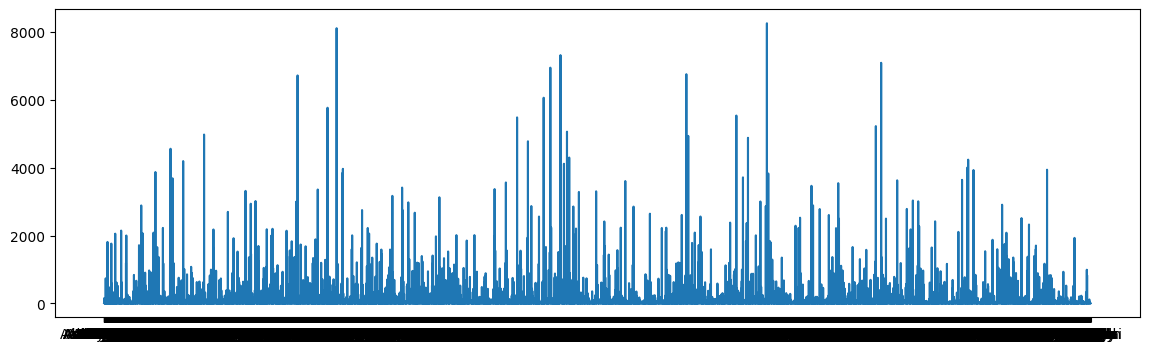

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4)) # Set the figure size ( 10 = width in inches , 6 = height in inches )
plt.plot(largest_count.index, largest_count["Count"])
plt.show()

In [ ]:
#Can you find the most popular baby name in the state of California (CA) for each year? use idxmax function.
#Provide a list of years along with the corresponding most popular names."

result = babynames.groupby("Year")['Count'].idxmax()
result

list_with_years = babynames.loc[result]
list_with_years


,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534
240064,CA,M,1913,John,614
1120,CA,F,1914,Mary,773
...,...,...,...,...,...
221194,CA,F,2018,Emma,2751
396004,CA,M,2019,Noah,2681
398869,CA,M,2020,Noah,2630
401665,CA,M,2021,Noah,2613


from matplotlib import pyplot as plt
list_with_years['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
list_with_years['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
list_with_years.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
list_with_years.plot(kind='scatter', x='Year', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = list_with_years.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = list_with_years.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
list_with_years['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
list_with_years['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(list_with_years['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(list_with_years, x='Year', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(list_with_years['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(list_with_years, x='Count', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

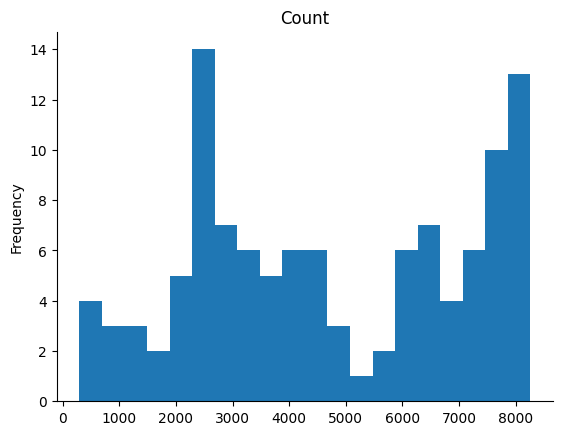

In [ ]:
from matplotlib import pyplot as plt
list_with_years['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Case Study: Name "Popularity"

In this exercise, let's find the name with sex "F" that has dropped most in popularity since its peak usage. We'll start by filtering `babynames` to only include names corresponding to sex "F".

In [ ]:
#Answer Here

f_babynames = babynames[babynames["Sex"] == "F"]
f_babynames

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
239532,CA,F,2022,Zemira,5
239533,CA,F,2022,Ziggy,5
239534,CA,F,2022,Zimal,5
239535,CA,F,2022,Zosia,5


In [ ]:
# We sort the data by year

f_babynames = f_babynames.sort_values("Year")
f_babynames
# type(f_babynames)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
148,CA,F,1910,Merle,9
149,CA,F,1910,Rosalie,9
150,CA,F,1910,Rosie,9
151,CA,F,1910,Teresa,9
...,...,...,...,...,...
237074,CA,F,2022,Korra,22
237075,CA,F,2022,Larissa,22
237047,CA,F,2022,Aida,22
237078,CA,F,2022,Lilyanna,22


To build our intuition on how to answer our research question, let's visualize the prevalence of the name "Jennifer" over time.

In [ ]:
# We'll talk about how to generate plots in a later lecture
fig = px.line(f_babynames[f_babynames["Name"] == "Jennifer"],
              x = "Year", y = "Count")
fig.update_layout(font_size = 18,
                  autosize=False,
                 width=1000,
                  height=400)

We'll need a mathematical definition for the change in popularity of a name.

Define the metric "ratio to peak" (RTP). We'll calculate this as the count of the name in 2022 (the most recent year for which we have data) divided by the largest count of this name in *any* year.

A demo calculation for Jennifer:

In [ ]:
# Find the highest Jennifer 'count'
jenn_max_count = f_babynames[f_babynames["Name"] == "Jennifer"].max()
jenn_max_count


State          CA
Sex             F
Year         2022
Name     Jennifer
Count        6065
dtype: object

In [ ]:
jenne_2022 = f_babynames[f_babynames["Name"] == "Jennifer"]
jenne_2022_sort = jenne_2022.sort_values("Year")
jenne_recent_count = jenne_2022_sort.tail(1)
jenne_recent_count


# Remember that we sorted f_babynames by year.
# This means that grabbing the final entry gives us the most recent count of Jennifers: 114
# In 2022, the most recent year for which we have data, 114 Jennifers were born


,State,Sex,Year,Name,Count
236136,CA,F,2022,Jennifer,114


In [ ]:
# Compute the RTP

compute_RTP = jenne_recent_count["Count"] / jenn_max_count["Count"]
print('Ratio TO Peek Value = ', compute_RTP)


Ratio TO Peek Value =  236136    0.018796
Name: Count, dtype: float64


We can also write a function that produces the `ratio_to_peak`for a given `Series`. This will allow us to use `.groupby` to speed up our computation for all names in the dataset.

In [ ]:
# define the function for RTP
def ratio_to_peak(Series):
"""
Compute the RTP for a Series containing the counts per year for a single name
"""


'\nCompute the RTP for a Series containing the counts per year for a single name\n'

In [ ]:
# Construct a Series containing our Jennifer count data
def ratio_to_peak(series):
  return series.iloc[-1] / max(series)

# Then, find the RTP using the function define above

rtp_series = f_babynames.groupby("Name")[["Year", "Count"]].agg(ratio_to_peak)
print('Ratio To Peak For Jennifer Data : \n\n',rtp_series)
# rtp_series
type(rtp_series)

Ratio To Peak For Jennifer Data : 

          Year     Count
Name                   
Aadhini   1.0  1.000000
Aadhira   1.0  0.500000
Aadhya    1.0  0.660000
Aadya     1.0  0.586207
Aahana    1.0  0.269231
...       ...       ...
Zyanya    1.0  0.466667
Zyla      1.0  1.000000
Zylah     1.0  1.000000
Zyra      1.0  1.000000
Zyrah     1.0  0.833333

[13782 rows x 2 columns]


pandas.core.frame.DataFrame

Now, let's use `.groupby` to compute the RTPs for *all* names in the dataset.

You may see a warning message when running the cell below. As discussed in lecture, `pandas` can't apply an aggregation function to non-numeric data (it doens't make sense to divide "CA" by a number). By default, `.groupby` will drop any columns that cannot be aggregated.

In [ ]:
# Results in a TypeError
# rtp_table = f_babynames.groupby("Name").agg(ratio_to_peak)
# rtp_table

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
# Find the RTP fro all names at once using groupby as describe in lec slides

rtp_table = f_babynames.groupby("Name")[["Count",'Year']].agg(ratio_to_peak)
rtp_table

,Count,Year
Name,,
Aadhini,1.000000,1.0
Aadhira,0.500000,1.0
Aadhya,0.660000,1.0
Aadya,0.586207,1.0
Aahana,0.269231,1.0
...,...,...
Zyanya,0.466667,1.0
Zyla,1.000000,1.0
Zylah,1.000000,1.0


To avoid the warning message above, we explicitly extract only the columns relevant to our analysis before using `.agg`.

In [ ]:
# Recompute the RTPs, but only performing the calculation on the "Count" column

rtp_table = f_babynames.groupby("Name")["Count"].agg(ratio_to_peak)
rtp_table


Name
Aadhini    1.000000
Aadhira    0.500000
Aadhya     0.660000
Aadya      0.586207
Aahana     0.269231
             ...   
Zyanya     0.466667
Zyla       1.000000
Zylah      1.000000
Zyra       1.000000
Zyrah      0.833333
Name: Count, Length: 13782, dtype: float64

In [ ]:
# Rename "Count" to "Count RTP" for clarity
rtp_table.rename("Count RTP")
rtp_table


Name
Aadhini    1.000000
Aadhira    0.500000
Aadhya     0.660000
Aadya      0.586207
Aahana     0.269231
             ...   
Zyanya     0.466667
Zyla       1.000000
Zylah      1.000000
Zyra       1.000000
Zyrah      0.833333
Name: Count, Length: 13782, dtype: float64

In [ ]:
# What name has fallen the most in popularity?

max_pop = rtp_table.idxmin()
max_pop


'Debra'

We can visualize the decrease in the popularity of the name "?:"

In [ ]:
# Ensure the 'Year' column is sorted
babynames = babynames.sort_values(by=["Name", "Year"])

# Group by 'Name' and calculate the first and last year counts
popularity_change = babynames.groupby("Name").agg(
    first_count=("Count", "first"),
    last_count=("Count", "last")
).reset_index()

# Calculate the decrease in popularity
popularity_change["Decrease"] = popularity_change["first_count"] - popularity_change["last_count"]

# Sort by the decrease in popularity and get the top 10
top_decreased_names = popularity_change.sort_values(by="Decrease", ascending=False).iloc[10:11]

# Extract the names of the top 10
top_names = top_decreased_names["Name"].tolist()
top_names

['Virginia']

In [ ]:
def plot_name(*names):
    fig = px.line(f_babynames[f_babynames["Name"].isin(names)],
                  x = "Year", y = "Count", color="Name",
                  title=f"Popularity for: {names}")
    fig.update_layout(font_size = 18,
                  autosize=False,
                  width=1500,
                  height=400)
    return fig
# pass the name into plot_name
plot_name(*top_names)

In [ ]:
# Find the 10 names that have decreased the most in popularity
# Answer Here

# Ensure the 'Year' column is sorted
babynames = babynames.sort_values(by=["Name", "Year"])

# Group by 'Name' and calculate the first and last year counts
popularity_change = babynames.groupby("Name").agg(
    first_count=("Count", "first"),
    last_count=("Count", "last")
).reset_index()

# Calculate the decrease in popularity
popularity_change["Decrease"] = popularity_change["first_count"] - popularity_change["last_count"]

# Sort by the decrease in popularity and get the top 10
top_10_decreased_names = popularity_change.sort_values(by="Decrease", ascending=False).head(10)

# Extract the names of the top 10
top_10_names = top_10_decreased_names["Name"].tolist()
top_10_names


['Mary',
 'Isamar',
 'Dorothy',
 'Helen',
 'Jaslene',
 'Aja',
 'Coraima',
 'Mildred',
 'Iridian',
 'Bethzy']

In [ ]:
plot_name(*top_10_names)

For fun, try plotting your name or your friends' names.

In [ ]:
# create Data Frame of my Friends Name
my_friends_name = pd.DataFrame([
                                ['Omer Farooq',1,24],
                                ['Arsalan Rafique',5,24],
                                ['Muzaffar Ali',2,24],
                                ['Danish Ali',3,24],
                                ['Ameer Hamza',4,24],

                                ['Omer Farooq',2,25],
                                ['Arsalan Rafique',3,25],
                                ['Muzaffar Ali',4,25],
                                ['Danish Ali',5,25],
                                ['Ameer Hamza',1,25],

                                ['Omer Farooq',4,26],
                                ['Arsalan Rafique',1,26],
                                ['Muzaffar Ali',5,26],
                                ['Danish Ali',2,26],
                                ['Ameer Hamza',3,26],

                                ['Omer Farooq',3,27],
                                ['Arsalan Rafique',2,27],
                                ['Muzaffar Ali',1,27],
                                ['Danish Ali',4,27],
                                ['Ameer Hamza',5,27],

                                ['Omer Farooq',5,28],
                                ['Arsalan Rafique',4,28],
                                ['Muzaffar Ali',3,28],
                                ['Danish Ali',1,28],
                                ['Ameer Hamza',2,28],

                                ],

                               columns=['Name', 'Study Hours', 'Age'])
print(f'My Friends Data Frame :\n\n', my_friends_name)



My Friends Data Frame :

                Name  Study Hours  Age
0       Omer Farooq            1   24
1   Arsalan Rafique            5   24
2      Muzaffar Ali            2   24
3        Danish Ali            3   24
4       Ameer Hamza            4   24
5       Omer Farooq            2   25
6   Arsalan Rafique            3   25
7      Muzaffar Ali            4   25
8        Danish Ali            5   25
9       Ameer Hamza            1   25
10      Omer Farooq            4   26
11  Arsalan Rafique            1   26
12     Muzaffar Ali            5   26
13       Danish Ali            2   26
14      Ameer Hamza            3   26
15      Omer Farooq            3   27
16  Arsalan Rafique            2   27
17     Muzaffar Ali            1   27
18       Danish Ali            4   27
19      Ameer Hamza            5   27
20      Omer Farooq            5   28
21  Arsalan Rafique            4   28
22     Muzaffar Ali            3   28
23       Danish Ali            1   28
24      Ameer Hamza     

In [ ]:
my_friends_name_Lists = my_friends_name.sort_values("Study Hours", ascending=True)
my_friends_name_Lists


,Name,Study Hours,Age
0,Omer Farooq,1,24
17,Muzaffar Ali,1,27
23,Danish Ali,1,28
11,Arsalan Rafique,1,26
9,Ameer Hamza,1,25
16,Arsalan Rafique,2,27
13,Danish Ali,2,26
24,Ameer Hamza,2,28
2,Muzaffar Ali,2,24
5,Omer Farooq,2,25


In [ ]:
# Plot My Friends Name with Study Or Not

def plot_friends_name(*names):
    fig = px.line(my_friends_name[my_friends_name["Name"].isin(names)],
                  x = "Age", y = "Study Hours", color="Name",
                  title=f"My Friends Name: \n{names}")
    fig.update_layout(font_size = 16,
                  autosize=False,
                  width=900,
                  height=500)
    return fig
# pass the name into plot_name
plot_friends_name(*my_friends_name_Lists.Name)